In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


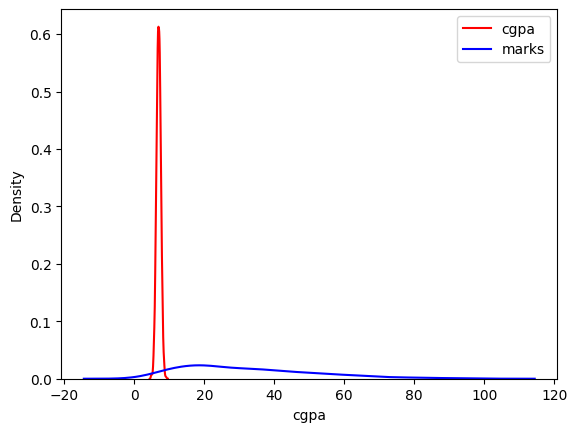

In [4]:
sns.kdeplot(df['cgpa'],color='red',label='cgpa')
sns.kdeplot(df['placement_exam_marks'],color='blue',label='marks')
plt.legend()

C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2225070072.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2225070072.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<AxesSubplot: xlabel='placement_exam_marks', ylabel='Density'>

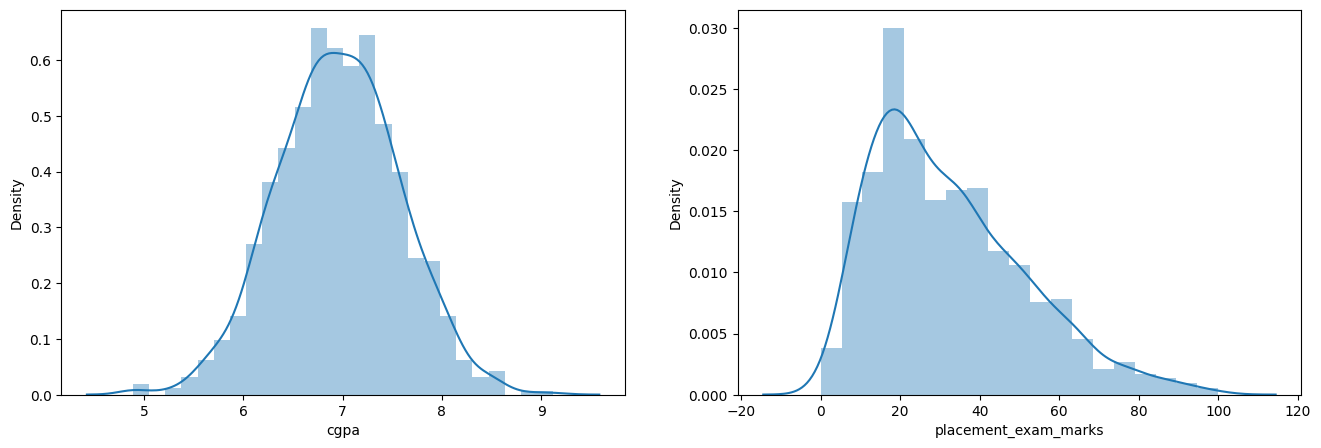

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

## Z- score can be used on cgpa because it has normal distribution

In [6]:
print("Mean of cgpa ",df['cgpa'].mean())
print("Standard deviation of cgpa ",df['cgpa'].std())
print("Max of cgpa ",df['cgpa'].max())
print("Min of cgpa ",df['cgpa'].min())

Mean of cgpa  6.96124
Standard deviation of cgpa  0.6158978751323894
Max of cgpa  9.12
Min of cgpa  4.89


In [7]:
upper_limit = df['cgpa'].mean()+3*df['cgpa'].std()

In [8]:
Lower_limit = df['cgpa'].mean()-3*df['cgpa'].std()

In [10]:
df[(df['cgpa'] < Lower_limit ) | (df['cgpa'] > upper_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [11]:
new_df = df[(df['cgpa'] > Lower_limit ) & (df['cgpa'] < upper_limit)]

In [12]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## Capping method

In [13]:
df['cgpa'] = np.where(df['cgpa']>upper_limit,
               upper_limit,
              np.where(df['cgpa']<Lower_limit
                       ,Lower_limit
                       ,df['cgpa']
                      )
              )

In [16]:
df[['cgpa']].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
